In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

def load_data_from_npy_files(data_dir):
    X, y = [], []
    
    for file_name in os.listdir(data_dir):
        if file_name.endswith('.npy'):
            file_path = os.path.join(data_dir, file_name)
            data = np.load(file_path, allow_pickle=True).item()  # Load the .npy file
            
            frames = data['frames']
            label = data['label']
            
            # Append the frames and label to the lists
            X.append(frames)
            y.append(label)
    
    # Convert lists to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Load training and testing data
train_data_dir = 'dataset/extracted_segments/train'
test_data_dir = 'dataset/extracted_segments/test'

X_train, y_train = load_data_from_npy_files(train_data_dir)
X_test, y_test = load_data_from_npy_files(test_data_dir)

# Split the training data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, Labels shape: {y_test.shape}")


Training data shape: (1431, 32, 64, 64, 3), Labels shape: (1431,)
Validation data shape: (358, 32, 64, 64, 3), Labels shape: (358,)
Testing data shape: (306, 32, 64, 64, 3), Labels shape: (306,)


In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from utils.c3d import build_c3d_feature_extractor, extract_features

c3d_feature_extractor = build_c3d_feature_extractor()
c3d_feature_extractor.summary()

X_train_features = extract_features(X_train, c3d_feature_extractor)
X_val_features = extract_features(X_val, c3d_feature_extractor)
X_test_features = extract_features(X_test, c3d_feature_extractor)

Model: "C3D_Feature_Extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 64, 64, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d (Conv3D)                 │ (None, 32, 64, 64, 64) │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 32, 32, 32, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 32, 32, 32,     │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 32, 16, 16,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 32, 16, 16,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 16, 8, 8, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_3 (Conv3D)               │ (None, 16, 8, 8, 512)  │     3,539,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 8, 4, 4, 512)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,651,008 (17.74 MB)

 Trainable params: 4,651,008 (17.74 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
# Step 2: Define the fully connected classifier
fc_classifier = Sequential([
Dense(512, activation='relu', input_shape=(X_train_features.shape[1],)),
Dense(256, activation='relu'),
Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
fc_classifier.compile(optimizer=Adam(learning_rate=0.001), 
loss='binary_crossentropy', 
metrics=['accuracy'])

checkpoint = ModelCheckpoint("models/c3d/c3d_model.keras", monitor='val_loss', save_best_only=True, verbose=1)

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Step 3: Train the classifier
c3d_feature_fc_history = fc_classifier.fit(X_train_features, y_train, epochs=20, batch_size=32, validation_data=(X_val_features, y_val), callbacks=[checkpoint, early_stop])

fc_classifier.save('models/c3d/c3d_model.h5')

/Users/vishnu/garage/cs512-f24-sellamshanmugavel-vishnupriyan/cv_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5034 - loss: 1.3451
Epoch 1: val_loss improved from inf to 0.68045, saving model to models/c3d/c3d_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5036 - loss: 1.3360 - val_accuracy: 0.5335 - val_loss: 0.6805
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5471 - loss: 0.6927
Epoch 2: val_loss improved from 0.68045 to 0.65892, saving model to models/c3d/c3d_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.5472 - loss: 0.6928 - val_accuracy: 0.5978 - val_loss: 0.6589
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6046 - loss: 0.6470
Epoch 3: val_loss improved from 0.65892 to 0.62917, saving model to models/c3d/c3d_model.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6044 - loss: 0.6472 - val_accuracy: 0.6285 - val_loss: 0.6292
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6676 - loss: 0.6093
Epoch 4: val_loss improved from

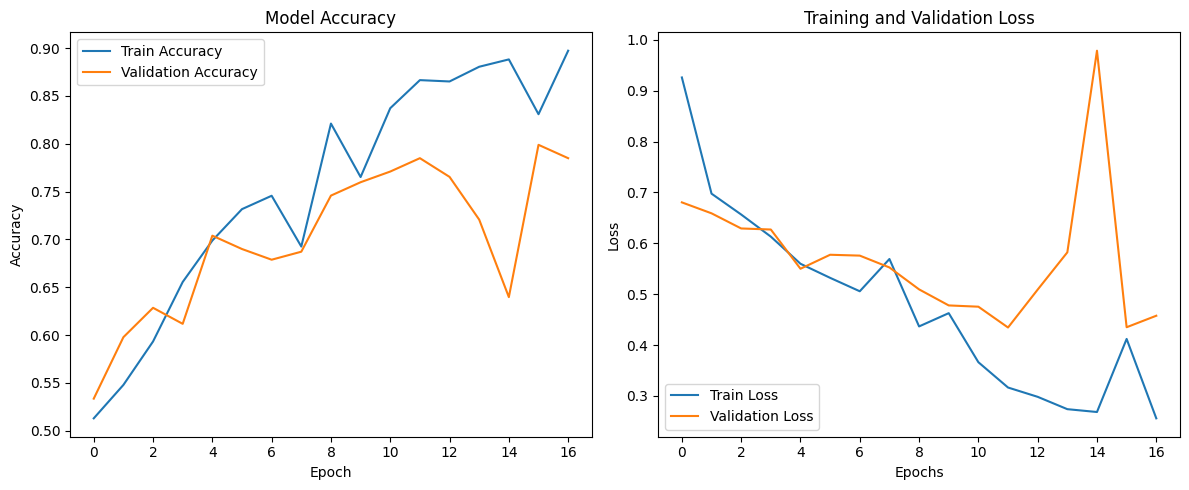

In [7]:
from utils.plots import plot_history, evaluate_and_plot

plot_history(c3d_feature_fc_history)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
      Dataset      Loss  Accuracy  Precision    Recall  F1-Score       AUC  \
0    Training  0.222517  0.904263   0.992614  0.835821  0.907495  0.913923   
1  Validation  0.457630  0.784916   0.850649  0.708108  0.772861  0.787580   
2        Test  0.425666  0.830065   0.933333  0.717949  0.811594  0.832308   

        mAP       IoU  
0  0.992212  0.345592  
1  0.900692  0.306766  
2  0.924393  0.284775  
Best IoU: 0.3456


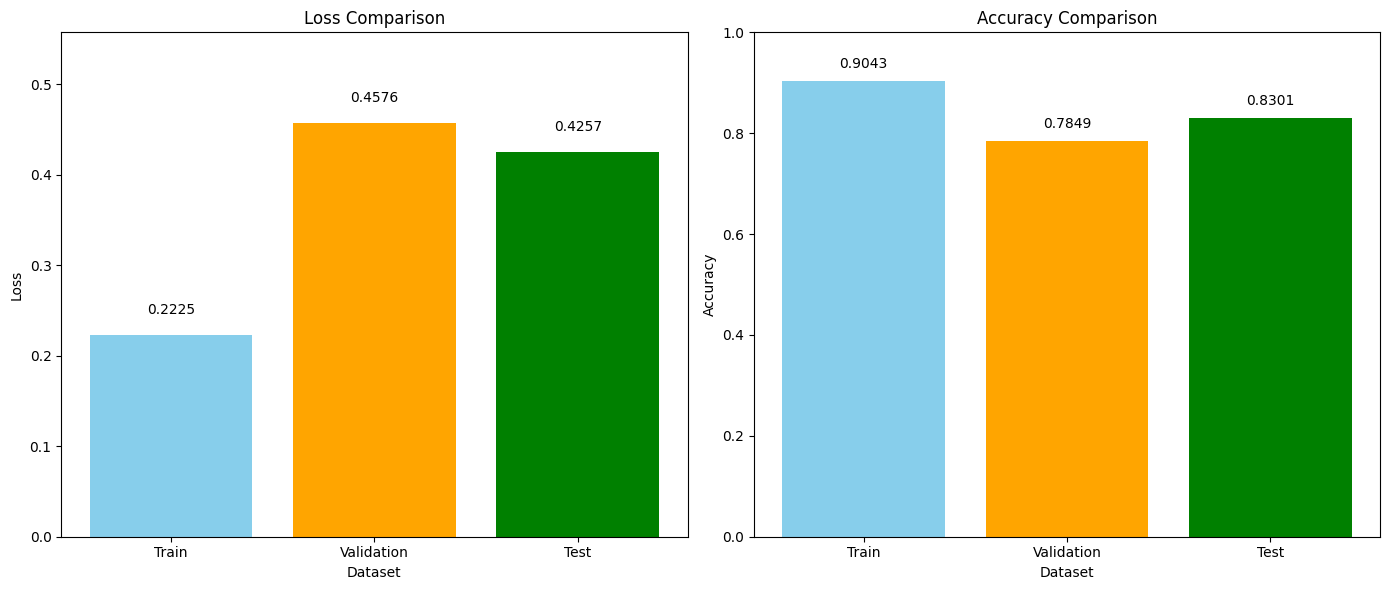

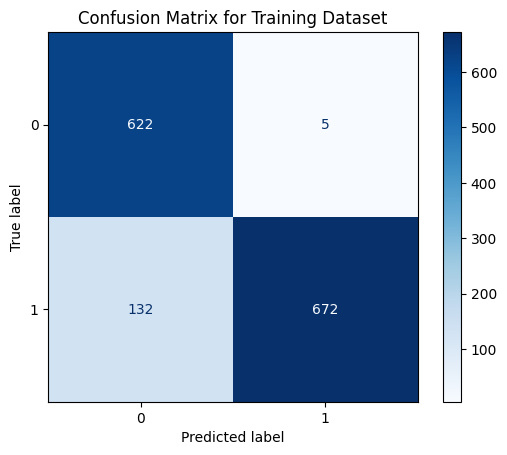

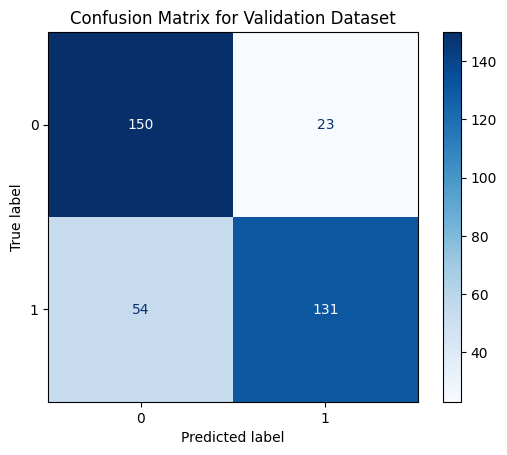

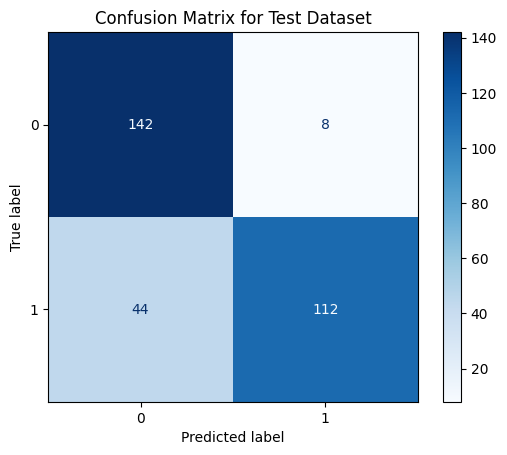

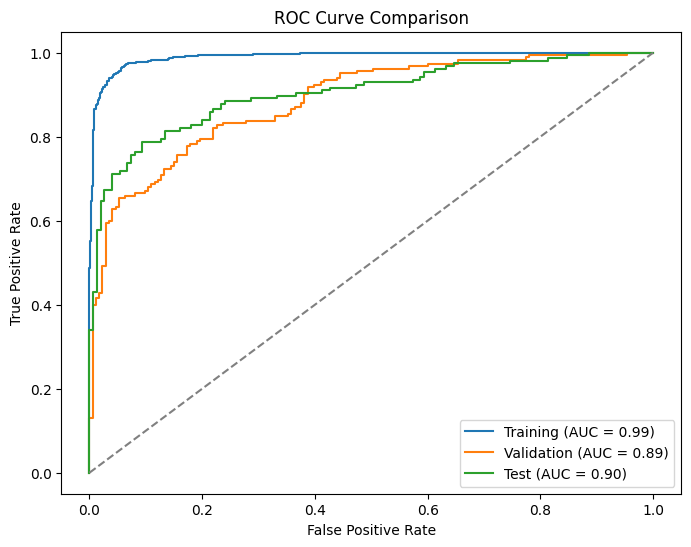

In [8]:
evaluate_and_plot(fc_classifier, X_train_features, y_train, X_val_features, y_val, X_test_features, y_test)